# Análise de Evasão Universitária

Caio Aloísio Andrade Silva (Universidade Federal de Sergipe)  
Gabriel Santos de Souza [](https://orcid.org/0009-0005-5652-617X) (Universidade Federal de Sergipe)  
Lucca Pedreira Dultra (Universidade Federal de Sergipe)  
Renato Vasconcelos Campos Filho (Universidade Federal de Sergipe)  
Tarcísio Almeida Mascarenhas (Universidade Federal de Sergipe)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [2]:
# Dataset.
ds = fetch_ucirepo(id=697)
# DataFrame.
df = ds.data.original

## Introdução

A evasão universitária é um fenômeno complexo que impacta tanto as instituições de ensino quanto a trajetória profissional dos estudantes. Compreender os fatores que levam um aluno a abandonar o curso ou a obter sucesso acadêmico é fundamental para a elaboração de políticas de retenção e suporte educacional mais eficazes.

Neste trabalho, investigamos o problema da desistência no ensino superior utilizando dados reais. A análise se justifica pela necessidade de identificar padrões ocultos que possam sinalizar, precocemente, estudantes em situação de risco.

Para isso, utilizamos o conjunto de dados *Predict Students’ Dropout and Academic Success*, disponível no *UCI Machine Learning Repository* \[@martinsEarlyPredictionStudents2021\]. Os dados provêm de uma instituição de ensino superior (Politécnico de Portalegre, Portugal) e englobam diversas dimensões da vida estudantil, incluindo fatores demográficos, socioeconômicos e de desempenho acadêmico prévio. A natureza dos dados é mista, contendo variáveis qualitativas (como estado civil e curso) e quantitativas (como notas e idade), permitindo uma análise estatística rica e multifacetada.

## Objetivo

O objetivo principal deste trabalho é aplicar técnicas de estatística descritiva para caracterizar o perfil dos estudantes e identificar variáveis potencialmente associadas à evasão escolar.

Para alcançar este propósito, definiram-se os seguintes objetivos específicos:

1.  **Resumir e Organizar:** Sintetizar as variáveis quantitativas do conjunto de dados, calculando medidas de tendência central (média, mediana) e dispersão (desvio padrão) para as notas de qualificação prévia.
2.  **Visualizar:** Construir representações gráficas, como histogramas e *boxplots*, para facilitar a interpretação da distribuição das idades e notas dos alunos.
3.  **Identificar Anomalias:** Detectar a presença de *outliers* (valores atípicos) nas notas de ingresso, investigando a existência de grupos com desempenho discrepante da maioria.
4.  **Caracterizar:** Descrever a natureza das variáveis disponíveis no banco de dados, classificando-as conforme seus tipos e escalas para fundamentar a escolha das técnicas estatísticas aplicadas.

## Materiais e Métodos

O dataset utilizado, *Predict Students’ Dropout and Academic Success* tem como origem o Instituto Politécnico de Portalegre (PP), Portugal \[@martinsEarlyPredictionStudents2021, p. 167\]. Os dados foram coletados desde 2008 até 2019 \[@martinsEarlyPredictionStudents2021, p. 168\]. Foi selecionado devido à relevância acadêmia e por não ter valores faltando em nenhuma das colunas, facilitando o processo de tratamento para a análise dos dados. A tabela a seguir detalha as variáveis encontradas no *dataset*, e seus tipos.

In [3]:
def classificar_variavel(coluna):
    """
    Classifica o tipo de variável e escala, obedecendo exceções.
    """
    dtype = coluna.dtype
    n_unicos = coluna.nunique()
    nome = coluna.name
    excecoes = [
        'Nacionality',
        "Mother's occupation",
        "Father's occupation"
    ]

    if dtype == 'string':
        return 'Qualitativa', 'Nominal'

    if np.issubdtype(dtype, np.floating):
        return 'Quantitativa', 'Contínua'

    if np.issubdtype(dtype, np.integer):
        # Se tiver menos de 20 valores únicos, então é uma categoria
        # (Estado Civil, Curso, Idade...)
        if (nome in excecoes) or (n_unicos < 20):
            return 'Qualitativa', 'Nominal'
        else:
            return 'Qualitativa', 'Discreta'

    return 'Outro', 'Outro'

dados_auto = []
for col_name in df.columns:
    tipo, escala = classificar_variavel(df[col_name])
    dados_auto.append({
        'Variável': col_name,
        'Tipo inferido': tipo,
        'Escala Inferida': escala
    })

pd.DataFrame(dados_auto)

Para o processamento e análise dos dados mediante gráficos, foi utilizada a linguagem de programação Python \[@python\]. A tabela a seguir detalha as bibliotecas usadas, e suas utilidades.

| Biblioteca | Função |
|-----------------------------|-------------------------------------------|
| matplotlib \[@MatplotlibPythonPlotting\] | Gerar gráficos a partir dos dados. |
| pandas \[@the_pandas_development_team_2026_18328522\] | Manipular o *dataset*. |
| ucimlrepo \[@UcimlrepoPackageEasily\] | Baixar o *dataset* pronto para manipulação do *UCI Machine Learning Repository*. |

## Resultados

In [4]:
# Calculando as estatísticas
descritiva = df['Previous qualification (grade)'].describe()

# Mostrando a tabela formatada.
descritiva.to_frame().style.format("{:.2f}")

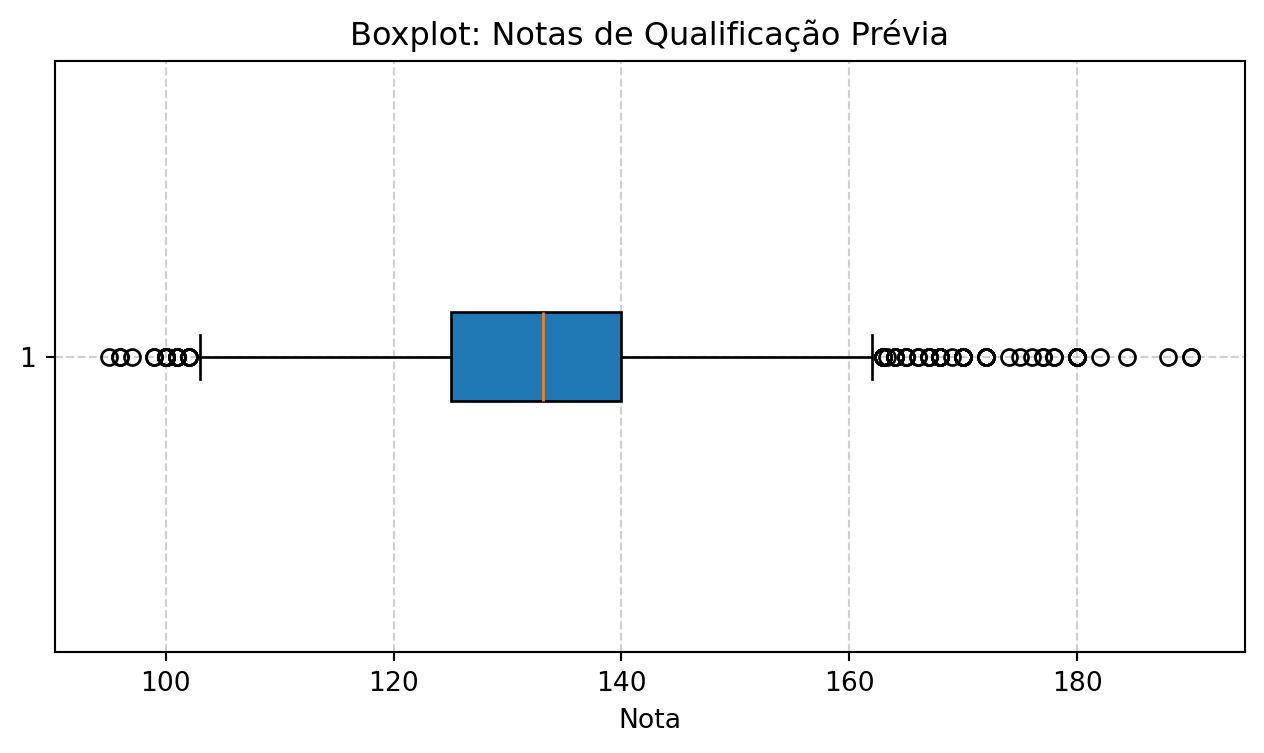

In [5]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Previous qualification (grade)'], vert=False, patch_artist=True)
plt.title('Boxplot: Notas de Qualificação Prévia')
plt.xlabel('Nota')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

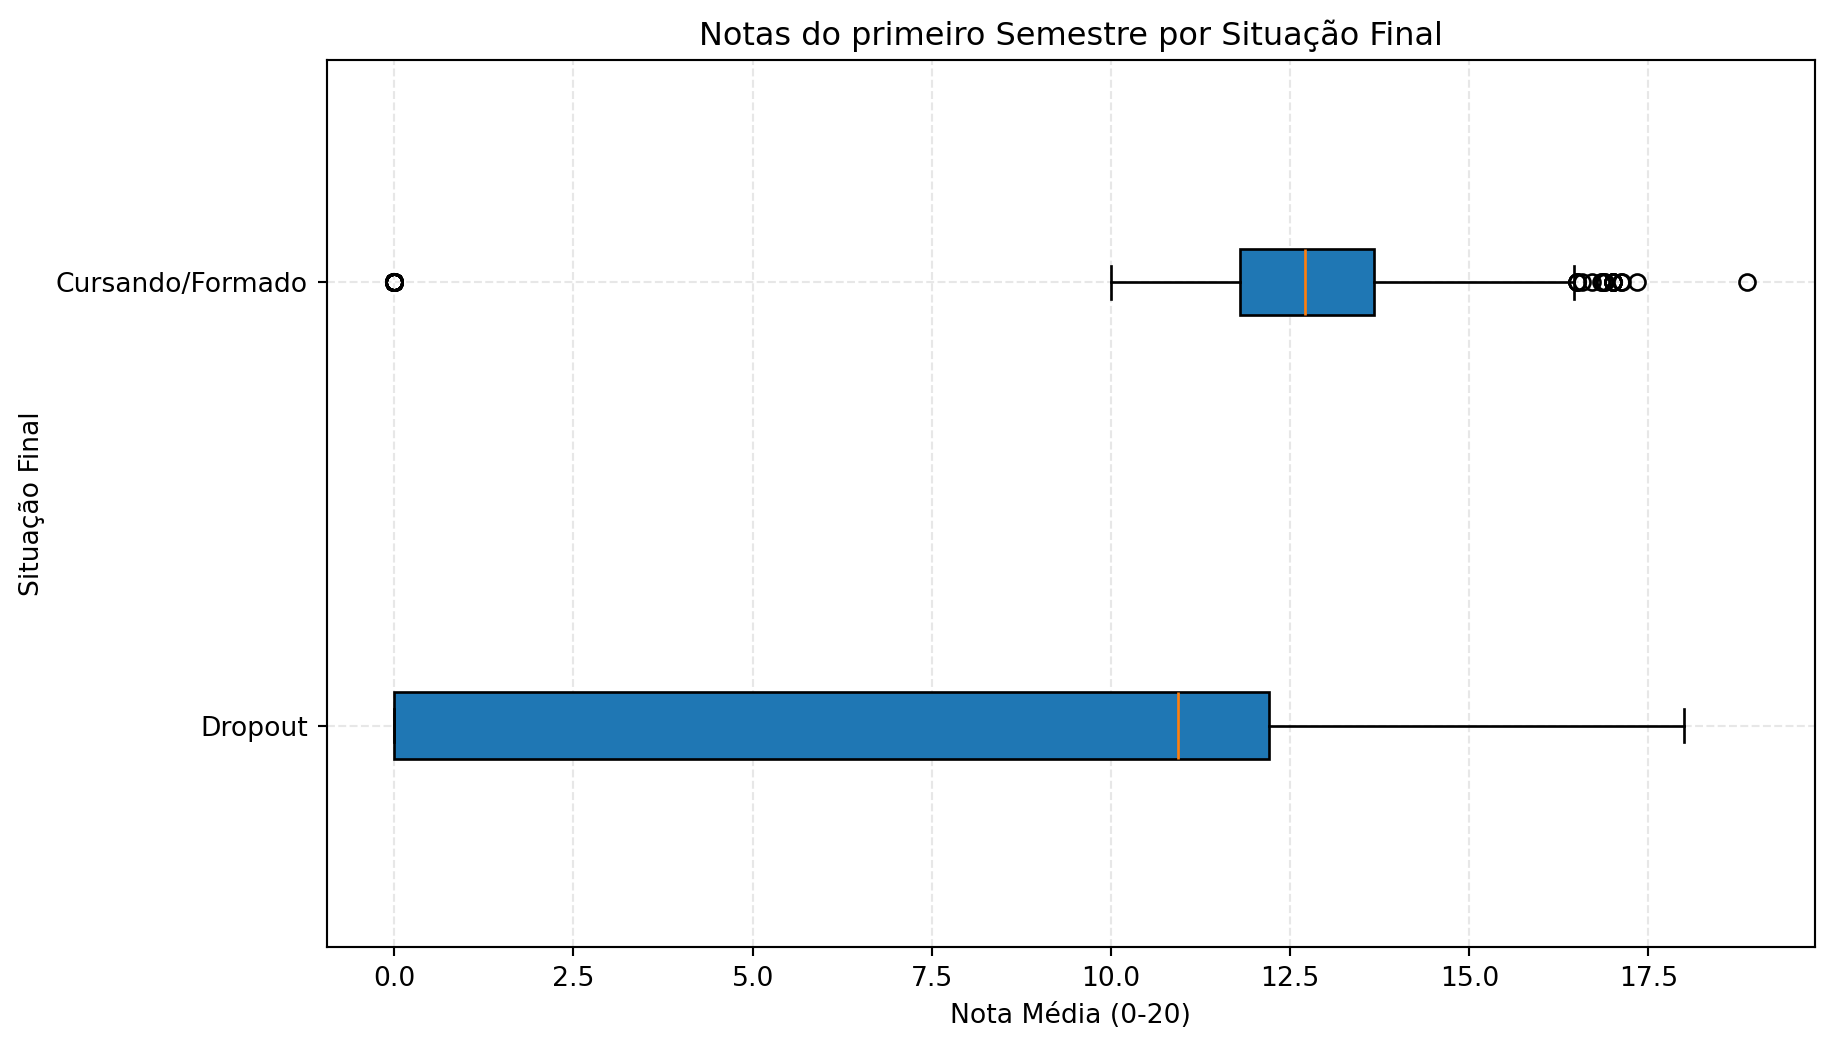

In [6]:
df['Situacao'] = df['Target'].apply(lambda x: 'Dropout' if x == 'Dropout' else 'Cursando/Formado')

grupos = ['Dropout', 'Cursando/Formado']
dados_plot = []

for grupo in grupos:
    filtro = df['Situacao'] == grupo
    valores = df.loc[filtro, 'Curricular units 1st sem (grade)']
    valores_limpos = valores[(valores >= 0) & (valores <= 20)]

    dados_plot.append(valores_limpos)

plt.figure(figsize=(10, 6))

plt.boxplot(dados_plot, tick_labels=grupos, patch_artist=True, vert=False)
plt.title('Notas do primeiro Semestre por Situação Final')
plt.xlabel('Nota Média (0-20)')
plt.ylabel('Situação Final')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

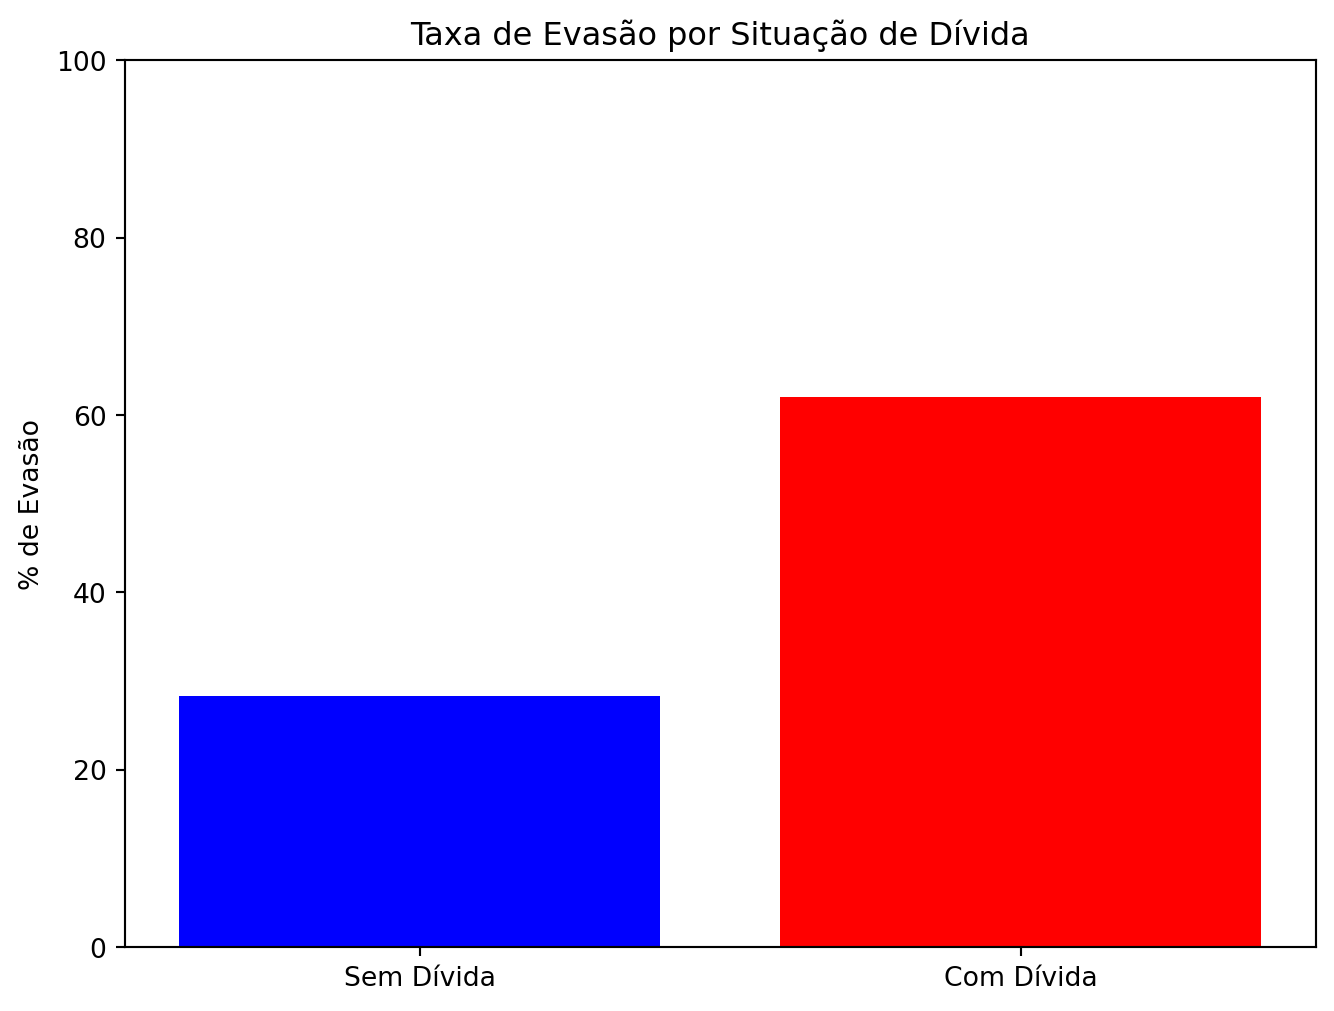

In [7]:
com_divida = df[df['Debtor'] == 1]
sem_divida = df[df['Debtor'] == 0]

taxa_com_divida = (com_divida['Target'] == 'Dropout').mean() * 100
taxa_sem_divida = (sem_divida['Target'] == 'Dropout').mean() * 100

categorias = ['Sem Dívida', 'Com Dívida']
valores = [taxa_sem_divida, taxa_com_divida]
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=['blue', 'red'])
plt.title('Taxa de Evasão por Situação de Dívida')
plt.ylabel('% de Evasão')
plt.ylim(0, 100)
plt.show()

### Análise dos Resultados

Com base na @tbl-estatisticas, observamos que a nota média de qualificação prévia dos alunos é de aproximadamente **132.6 pontos**, com uma mediana muito próxima (**133.1**), o que indica uma distribuição relativamente simétrica.

Entretanto, o **Boxplot (@fig-boxplot-notas)** revela a presença clara de **outliers** (valores atípicos). Notamos um grupo de alunos com notas excepcionalmente altas (acima de 160) e outro com notas muito baixas (abaixo de 100). Esses pontos discrepantes sugerem que o nível de preparo prévio dos alunos é bastante heterogêneo.

## Conclusão

## Relato Pessoal

## Referências